In [74]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,  # Plik nie zawiera wiersza nagłówkowego z nazwami kolumn
                     encoding='utf-8')  # Określa kodowanie znaków pliku
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    # Wczytanie danych z lokalnej ścieżki:
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [75]:
# Poniższy kod przedstawia implementację funkcji,
# która wizualizuje granicę decyzyjną klasyfikatora dla dwuwymiarowej przestrzeni cech.

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):  # resolution - rozmiar kroku siatki do wizualizacji przestrzeni

    # Definiujemy listy markerów i kolorów, które będą używane do reprezentowania różnych klas na wykresie:
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Tworzymy mapę kolorów ListedColormap na podstawie kolorów określonych w colors. 
    # cmap to obiekt, który Matplotlib używa do mapowania liczb na kolory
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Wykres obszarów decyzyjnych:
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Określamy zakresy wartości dla obu cech (-/+ 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  # Tworzymy dwuwymiarową siatkę punktów do wizualizacji przestrzeni cech
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # Liczymy predykcje dla każdego punktu siatki
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)  # Rysowanie konturu granic decyzyjnych
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())  # Ustawiono granice osi wykresu

    # Rysowanie przykładów z rozważanych klas:
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [76]:
import numpy as np

# Wydzielamy dwa gatunki (setosa oraz versicolor):
y = df.iloc[0:100, 4].values  # Wybiera wiersze od 0 do 99 i 5-tą kolumnę
                              # Metoda .values konwertuje tę kolumnę na tablicę NumPy
y = np.where(y == 'Iris-setosa', 0, 1)

# Wydzielamy dwie cechy (sepal length oraz petal length):
X = df.iloc[0:100, [0, 2]].values

In [77]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Sieci neuronowe i Deep Learning
# Temat 2: Adaline i metoda gradientu prostego

## Zadanie 2.1

Rozważyć cztery scenariusze uczenia modelu Adaline na rozważanym zbiorze danych Iris (2 cechy i 2 klasy):
1. Adaline z wykorzystaniem wsadowej wersji metody gradientu prostego, bez standaryzacji cech,
2. Adaline z wykorzystaniem wsadowej wersji metody gradientu prostego, ze standaryzacją cech,
3. Adaline z wykorzystaniem wersji SGD metody gradientu prostego (aproksymacja funkcji celu na podstawie jednego przykładu), bez standaryzacji cech,
4. Adaline z wykorzystaniem wersji SGD metody gradientu prostego (aproksymacja funkcji celu na podstawie jednego przykładu), ze standaryzacją cech.

Dla każdego scenariusza znaleźć optymalny parametr uczenia, a następnie porównać te scenariusze pod kątem szybkości uczenia się sieci neuronowej.

In [78]:
import numpy as np  # Wykorzystana do przekształceń z tablicami oraz do generowania liczb losowych
import matplotlib.pyplot as plt

class AdalineGD:
    """ADAptive LInear NEuron classifier. (GD = Gradient Descent)

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.losses_ = []  # Zamiast self.errors_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # W przypadku Adaline funkcji activation() nie musimy tak naprawdę definiować,
            # ponieważ jest ona funkcją tożsamościową
            # (można by napisać wprost output = self.net_input(X)).
            # Definiujemy metodę activation jedynie dla uniwersalności kodu
            # (łatwo można np. przerobić go na regresję logistyczną, używając funkcji sigmoidalnej).
            output = self.activation(net_input)
            errors = (y - output)    
            
            # Można tak, ale byłoby mniej efektywnie:
            # for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)  # Zmiana na >= 0.5

In [79]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [80]:
def find_optimal_eta(X, y, X_std, model_type = 'batch', use_std = False, eta_range = [10 ** i for i in range(-5,-1)]):
    n_iter = 15
    losses = {}
    
    X_train = X_std if use_std else X
    
    for eta in eta_range:
        if model_type == "batch":
            model = AdalineGD(eta=eta, n_iter=n_iter)
        else:
            model = AdalineSGD(eta=eta, n_iter=n_iter)
        model.fit(X_train, y)
        losses[eta] = model.losses_
    min_loss = float('inf')
    for eta, loss_vals in losses.items():
        if loss_vals[-1] < min_loss:
            min_loss = loss_vals[-1]
            optimal_eta = eta
    return optimal_eta, losses
        

In [81]:
def plot_learning_curves(losses, model_type):
    plt.figure(figsize=(12,8))
    for eta, loss_values in losses.items():
        plt.plot(range(1, len(loss_values)+1), loss_values, label=f'eta = {eta}')
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.title(f'{model_type} model')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

Optimal eta Batch GD, bez standaryzacji: 0.01
Optimal eta Batch GD, z standaryzacją: 0.01
Optimal eta SGD, bez standaryzacji: 0.001
Optimal eta SGD, z standaryzacją: 0.01


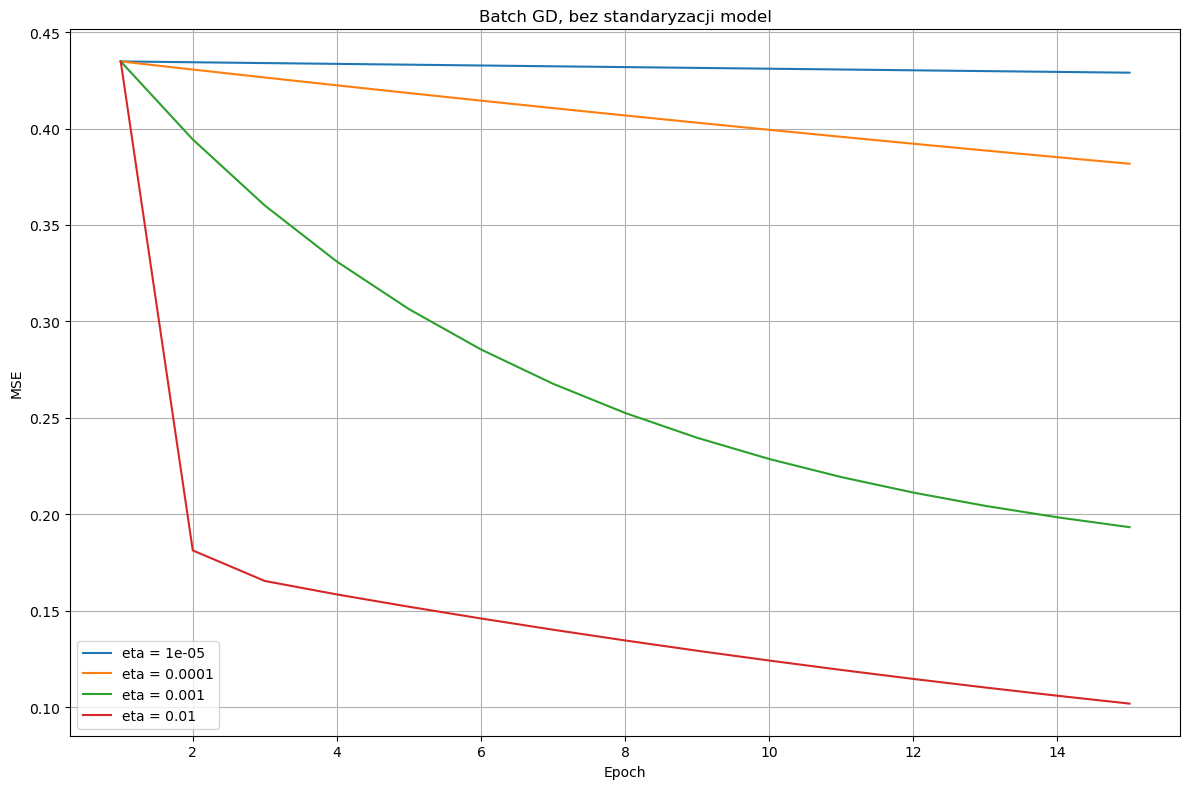

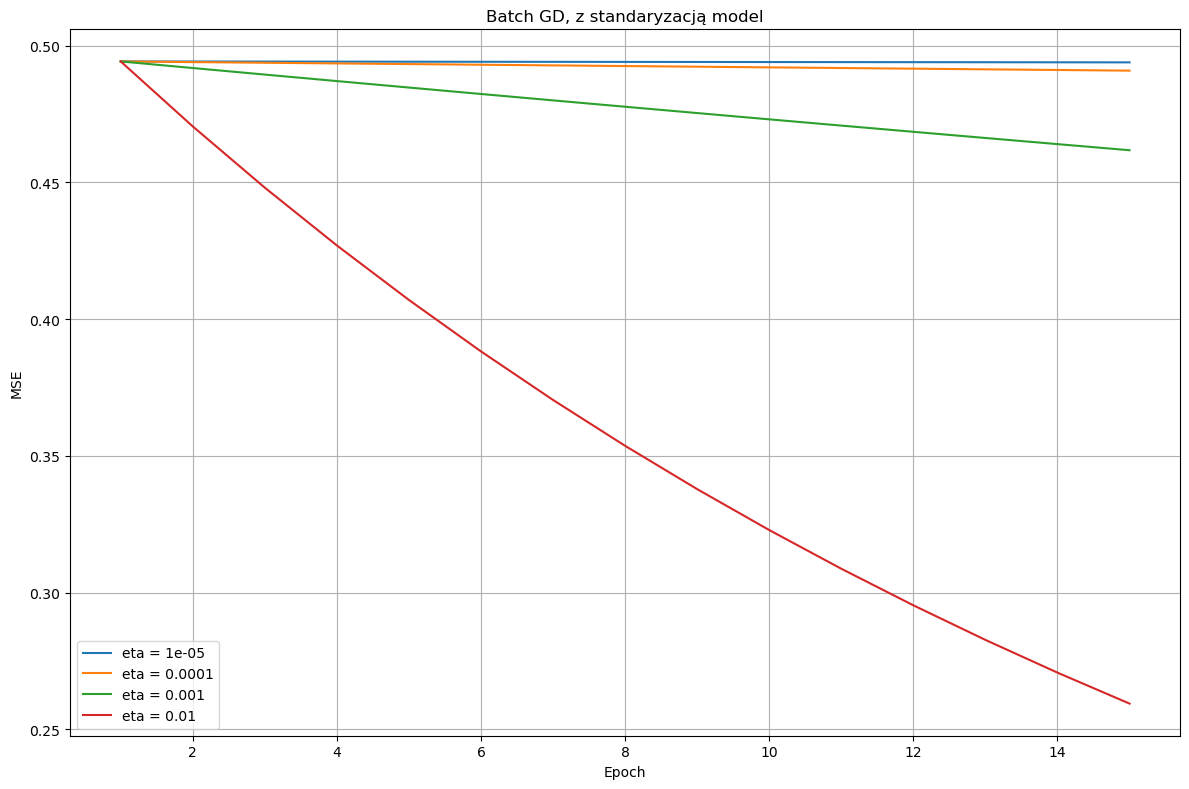

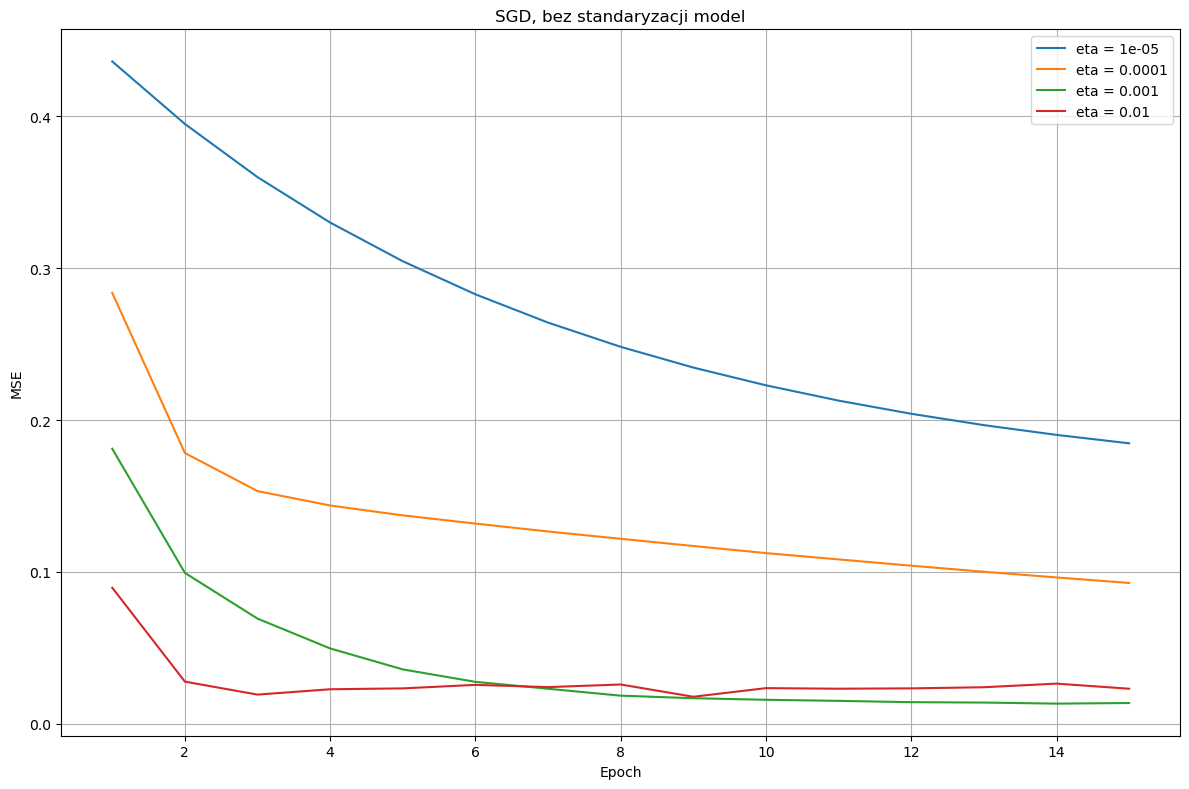

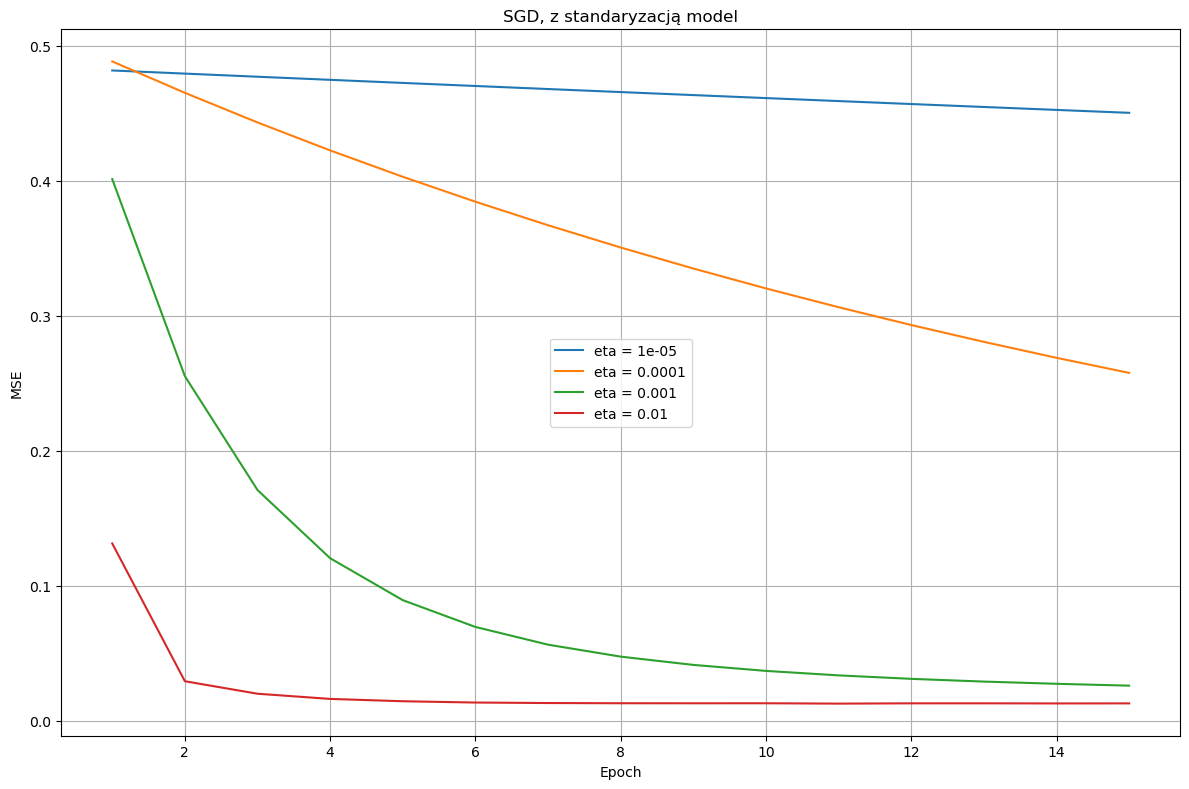

In [82]:
#Scenariusz 1:
opt_eta1, losses1 = find_optimal_eta(X, y, X_std, model_type='batch', use_std=False)
print(f'Optimal eta Batch GD, bez standaryzacji: {opt_eta1}')
plot_learning_curves(losses1, 'Batch GD, bez standaryzacji')
#Scenariusz 2:
opt_eta2, losses2 = find_optimal_eta(X, y, X_std, model_type='batch', use_std=True)
print(f'Optimal eta Batch GD, z standaryzacją: {opt_eta2}')
plot_learning_curves(losses2, 'Batch GD, z standaryzacją')
#Scenariusz 3:
opt_eta3, losses3 = find_optimal_eta(X, y, X_std, model_type='sgd', use_std=False)
print(f'Optimal eta SGD, bez standaryzacji: {opt_eta3}')
plot_learning_curves(losses3, 'SGD, bez standaryzacji')
#Scenariusz 4:
opt_eta4, losses4 = find_optimal_eta(X, y, X_std, model_type='sgd', use_std=True)
print(f'Optimal eta SGD, z standaryzacją: {opt_eta4}')
plot_learning_curves(losses4, 'SGD, z standaryzacją')


In [83]:
def compare_scenarios(optimal_etas, scenario_losses):
    plt.figure(figsize=(12,8))
    
    opis = [
        "Batch GD, bez standaryzacji",
        "Batch GD, z standaryzacją",
        "SGD, bez standaryzacji",
        "SGD, z standaryzacją"
    ]
    
    for i, (eta, losses) in enumerate(zip(optimal_etas, scenario_losses)):
        plt.plot(range(1, len(losses[eta]) + 1), losses[eta], label=f'{opis[i]} (eta={eta})')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('Porównanie scenariuszy pod kątem uczenia się')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()        


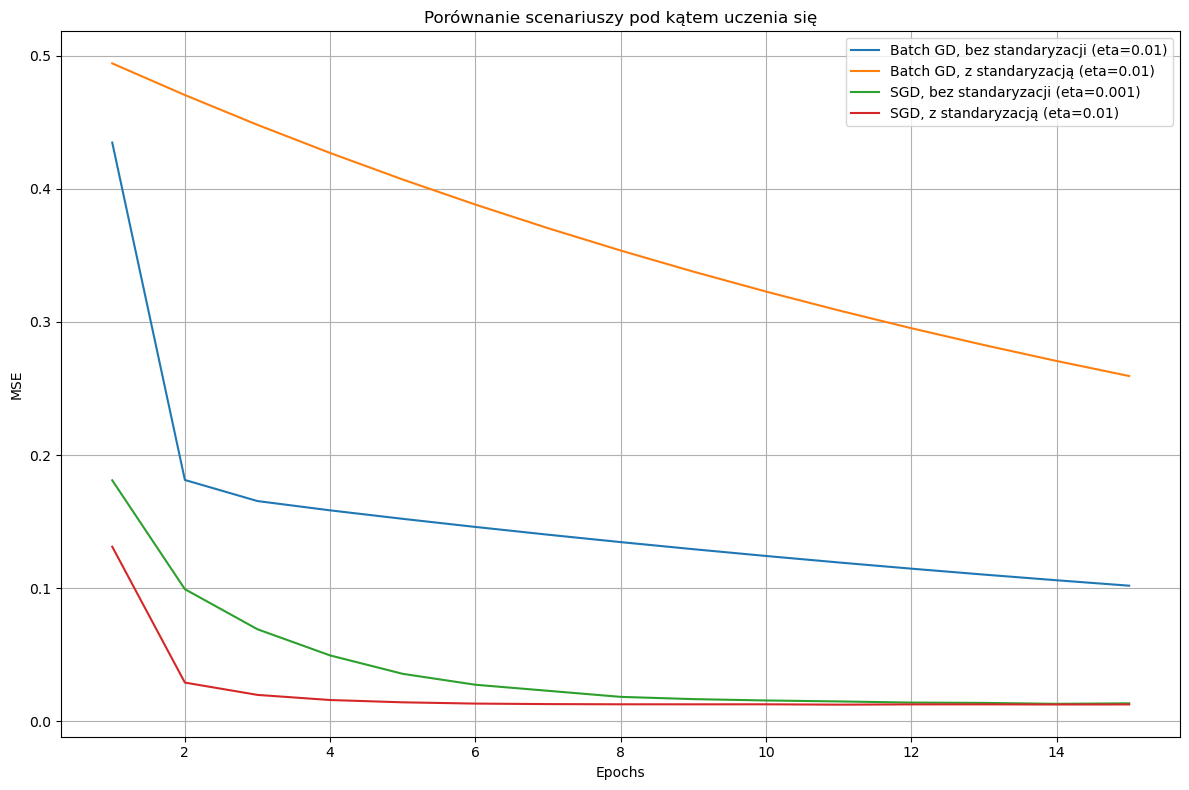

In [84]:
compare_scenarios([opt_eta1, opt_eta2, opt_eta3, opt_eta4], [losses1, losses2, losses3, losses4])
plt.show()


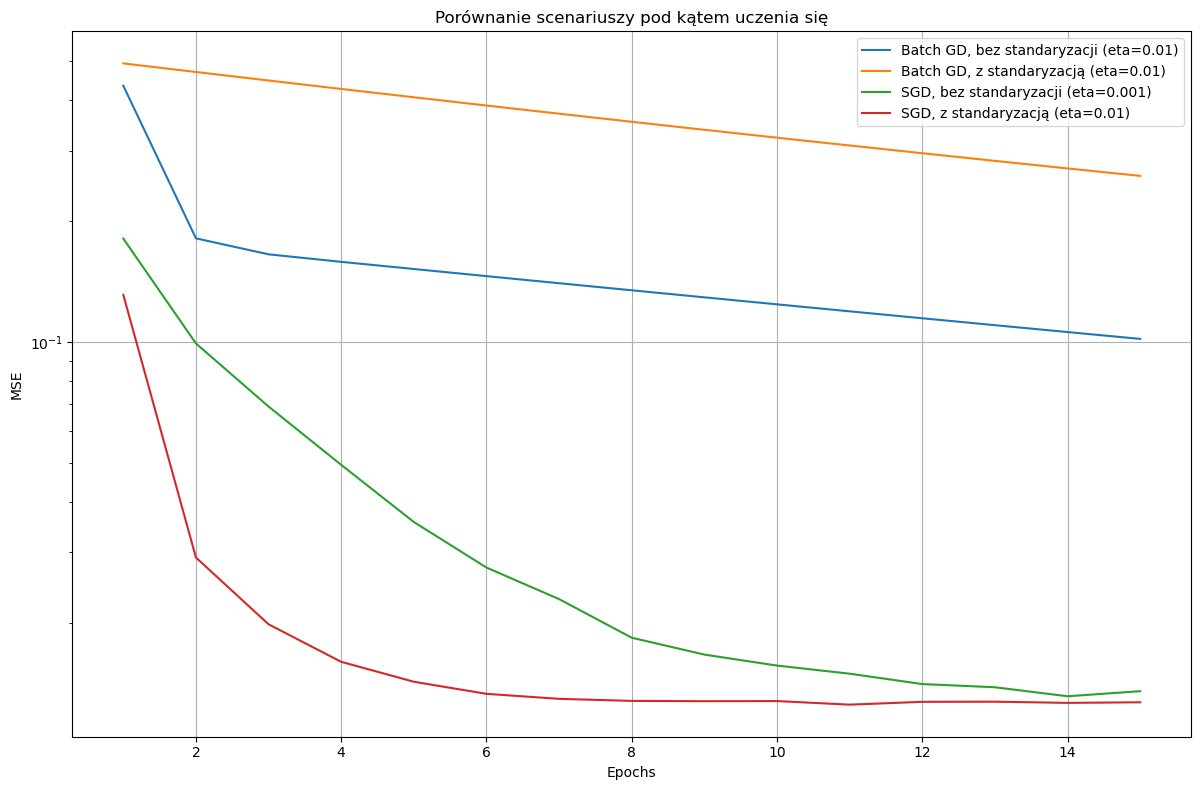

In [85]:
compare_scenarios([opt_eta1, opt_eta2, opt_eta3, opt_eta4], [losses1, losses2, losses3, losses4])
plt.yscale('log')
plt.show()


## Zadanie 2.2

Wybrać najlepsze z czterech rozważanych w ramach poprzedniego zadania podejść i zbudować model dla pełnego zbioru danych Iris (4 cechy, 3 klasy).

W celu poradzenia sobie z trzema klasami wykorzystać podejście OvA (one-versus-all)
(czasami nazywana także one-versus-rest, OvR).

Trenujemy po jednym klasyfikatorze dla każdej klasy -
wybrana klasa jest traktowana jako klasa pozytywna, a pozostałe klasy uznawane są za klasy negatywne.

Klasyfikacja polega na użyciu wszystkich klasyfikatorów ($k$ klasyfikatorów dla $k$ klas)
i wybraniu klasy, która według tych klasyfikatorów jest ,,najbardziej prawdopodobna" (ma najwyższy wynik).

Obliczyć błąd finalnego modelu na danych uczących (czyli w tym przypadku na całym zbiorze danych).

In [120]:
y = df.iloc[:, 4].values
X = df.iloc[:, :4].values

In [121]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()

In [122]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [123]:
def find_optimal_eta(X, y, X_std, model_type = 'batch', use_std = False, eta_range = [10 ** i for i in range(-5,-1)]):
    n_iter = 15
    losses = {}
    
    X_train = X_std if use_std else X
    
    for eta in eta_range:
        if model_type == "batch":
            model = AdalineGD(eta=eta, n_iter=n_iter)
        else:
            model = AdalineSGD(eta=eta, n_iter=n_iter)
        model.fit(X_train, y)
        losses[eta] = model.losses_
    min_loss = float('inf')
    for eta, loss_vals in losses.items():
        if loss_vals[-1] < min_loss:
            min_loss = loss_vals[-1]
            optimal_eta = eta
    return optimal_eta, losses
    


In [124]:
n_iter = 15
classes = np.unique(y)
n_classes = len(classes)
classifiers = []

for c in classes:
    y_bin = np.where(y == c, 1, 0)
    best_eta, losses = find_optimal_eta(X, y_bin, X_std, model_type = 'sgd', use_std = True)
    clf = AdalineSGD(eta = best_eta, n_iter = n_iter)
    clf.fit(X_std, y_bin)
    classifiers.append(clf)
    print(f"Best eta for {c}: {best_eta}")

Best eta for Iris-setosa: 0.01
Best eta for Iris-versicolor: 0.001
Best eta for Iris-virginica: 0.01


In [125]:
def predict_ova(X, classifiers, closses):
    scores = np.array([clf.net_input(X) for clf in classifiers])
    return classes[np.argmax(scores, axis=0)]

In [126]:
y_pred = predict_ova(X_std, classifiers, classes)
error = np.sum(y != y_pred) / len(y)
acc = 1 - error
print(f"Liczba błędnych klasyfikacji: {np.sum(y != y_pred)} z {len(y)}")
print(f"Błąd: {error:.4f}")
print(f"Dokładność: {acc:.4f}")

Liczba błędnych klasyfikacji: 22 z 150
Błąd: 0.1467
Dokładność: 0.8533


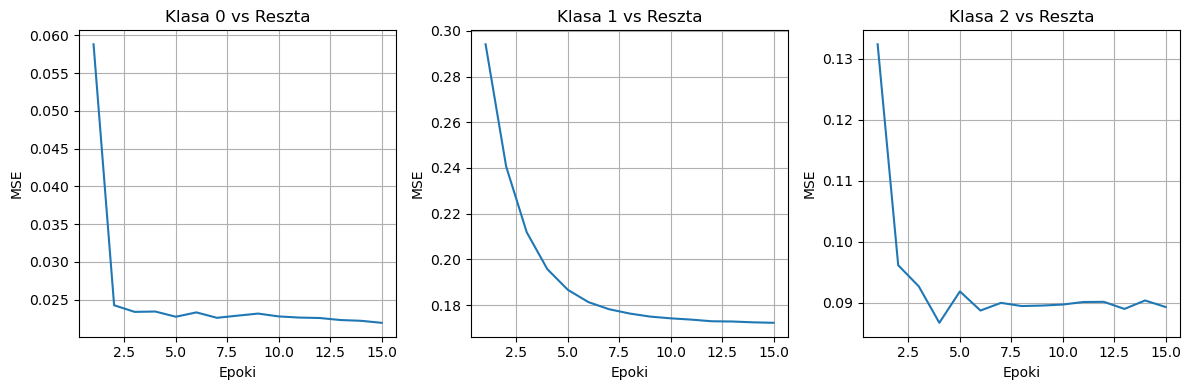

In [127]:
plt.figure(figsize=(12, 4))
for i, clf in enumerate(classifiers):
    plt.subplot(1, 3, i+1)
    plt.plot(range(1, len(clf.losses_) + 1), clf.losses_)
    plt.xlabel('Epoki')
    plt.ylabel('MSE')
    plt.title(f'Klasa {i} vs Reszta')
    plt.grid(True)
plt.tight_layout()
plt.show()

## Zadanie 2.3*

Zmodyfikować definicję klasy Adaline tak, aby do uczenia modelu wykorzystywała metodę gradientu prostego z minigrupami (rozmiar minigrup jako parametr metody):
w każdym przebiegu gradient obliczany jest na podstawie niewielkich grup losowo dobieranych danych.

Porównać działanie metody dla różnych rozmiarów minigrup (zaczynając od rozmiaru jeden, czyli od standardowej wersji SGD).

In [93]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None, batch_size = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        self.batch_size = batch_size
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            # Tworzymy mini-batche
            mini_batches_X, mini_batches_y = self._create_mini_batches(X, y)
            losses = []
            
            # Aktualizujemy wagi dla każdego mini-batcha
            for X_mini, y_mini in zip(mini_batches_X, mini_batches_y):
                # Obliczamy aktualizację wag dla mini-batcha
                output = self.activation(self.net_input(X_mini))
                errors = (y_mini - output)
                
                # Aktualizacja wag i biasu
                self.w_ += self.eta * 2.0 * X_mini.T.dot(errors) / X_mini.shape[0]
                self.b_ += self.eta * 2.0 * errors.mean()
                
                # Obliczamy błąd dla mini-batcha
                batch_loss = np.mean(errors**2)
                losses.append(batch_loss)
            
            # Średni błąd dla całej epoki
            self.losses_.append(np.mean(losses))
            
        return self


    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _create_mini_batches(self, X, y):
        X_mini_batches = np.array_split(X, len(X) / self.batch_size)
        y_mini_batches = np.array_split(y, len(y) / self.batch_size)
        return X_mini_batches, y_mini_batches
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [94]:
import numpy as np
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,  # Plik nie zawiera wiersza nagłówkowego z nazwami kolumn
                     encoding='utf-8')  # Określa kodowanie znaków pliku
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    # Wczytanie danych z lokalnej ścieżki:
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
# Wydzielamy dwa gatunki (setosa oraz versicolor):
y = df.iloc[0:100, 4].values  # Wybiera wiersze od 0 do 99 i 5-tą kolumnę
                              # Metoda .values konwertuje tę kolumnę na tablicę NumPy
y = np.where(y == 'Iris-setosa', 0, 1)

# Wydzielamy dwie cechy (sepal length oraz petal length):
X = df.iloc[0:100, [0, 2]].values

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [95]:
batch_sizes = [1, 5, 10, 25, 50, 100]
models = {}
for batch_size in batch_sizes:
    model = AdalineSGD(eta=0.001, n_iter=15, batch_size=batch_size)
    model.fit(X,y)
    models[batch_size] = model
    print(f"Batch size: {batch_size}, Final loss: {model.losses_[-1]:.6f}")


Batch size: 1, Final loss: 0.012620
Batch size: 5, Final loss: 0.057114
Batch size: 10, Final loss: 0.101607
Batch size: 25, Final loss: 0.121492
Batch size: 50, Final loss: 0.164818
Batch size: 100, Final loss: 0.185466


## Zadanie 2.4*

Zbadać zmianę jakości modelu (w sensie dopasowania do danych uczących) wraz ze wzrostem rozmiaru danych. Wykorzystać metodę `partial_fit` do douczania modelu przykład po przykładzie.

Wyniki przedstawić w formie wykresu (jakość od rozmiaru danych).

In [96]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X.ravel(), y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [97]:
from sklearn.metrics import mean_squared_error, accuracy_score
def incremental_learning(X, y, eta = 0.01, n_iter = 15, step_size = 5):
    
    model = AdalineSGD(eta=eta, n_iter=n_iter)
    data_sizes = []
    mse_vals = []
    acc_vals = []
    X_std = np.copy(X)
    r = np.random.permutation(len(y))
    
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X_std = X_std[r]
    y = y[r]
    initial_s = min(step_size, len(X_std))
    
    X_initial = X_std[:initial_s]
    y_initial = y[:initial_s]
    model.fit(X_initial, y_initial)
    
    output_initial = model.net_input(X_initial)
    mse_initial = mean_squared_error(y_initial, output_initial)
    y_pred_initial = model.predict(X_initial)
    acc_initial = accuracy_score(y_initial, y_pred_initial)
    
    data_sizes.append(initial_s)
    mse_vals.append(mse_initial)
    acc_vals.append(acc_initial)
    
    curr = initial_s
    
    while curr < len(X_std):
        next = min(curr+step_size, len(X_std))
        
        X_new = X_std[curr:next]
        y_new = y[curr:next]
        
        for xi,yi in zip(X_new, y_new):
            model.partial_fit(xi.reshape(1,-1), np.array([yi]))
        X_curr = X_std[:next]
        y_curr = y[:next]
        output_curr = model.net_input(X_curr)
        mse_curr = mean_squared_error(y_curr, output_curr)
        
        y_pred_curr = model.predict(X_curr)
        acc_curr = accuracy_score(y_curr, y_pred_curr)
        
        data_sizes.append(next)
        mse_vals.append(mse_curr)
        acc_vals.append(acc_curr)
        
        curr = next
        
    return data_sizes, mse_vals, acc_vals
        


In [98]:
import numpy as np

# Wydzielamy dwa gatunki (setosa oraz versicolor):
y = df.iloc[0:100, 4].values  # Wybiera wiersze od 0 do 99 i 5-tą kolumnę
                              # Metoda .values konwertuje tę kolumnę na tablicę NumPy
y = np.where(y == 'Iris-setosa', 0, 1)

# Wydzielamy dwie cechy (sepal length oraz petal length):
X = df.iloc[0:100, [0, 2]].values

In [104]:
data_sizes, mse_values, acc_values = incremental_learning(
        X, y, eta=0.001, n_iter=15, step_size=5)

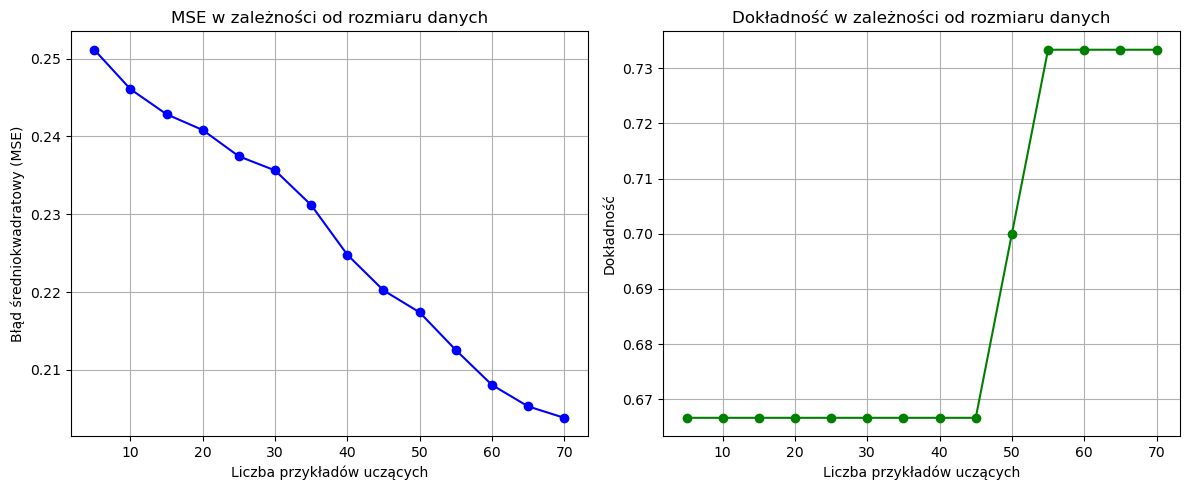


Wyniki:
Liczba przykładów   |   MSE    |   Dokładność
---------------------------------------------
        5          | 0.251148 | 0.666667
        10         | 0.246085 | 0.666667
        15         | 0.242857 | 0.666667
        20         | 0.240829 | 0.666667
        25         | 0.237449 | 0.666667
        30         | 0.235640 | 0.666667
        35         | 0.231184 | 0.666667
        40         | 0.224802 | 0.666667
        45         | 0.220220 | 0.666667
        50         | 0.217395 | 0.700000
        55         | 0.212556 | 0.733333
        60         | 0.208067 | 0.733333
        65         | 0.205310 | 0.733333
        70         | 0.203841 | 0.733333


In [105]:
plt.figure(figsize=(12, 5))
    
plt.subplot(1, 2, 1)
plt.plot(data_sizes, mse_values, 'o-', color='blue')
plt.xlabel('Liczba przykładów uczących')
plt.ylabel('Błąd średniokwadratowy (MSE)')
plt.title('MSE w zależności od rozmiaru danych')
plt.grid(True)
    
plt.subplot(1, 2, 2)
plt.plot(data_sizes, acc_values, 'o-', color='green')
plt.xlabel('Liczba przykładów uczących')
plt.ylabel('Dokładność')
plt.title('Dokładność w zależności od rozmiaru danych')
plt.grid(True)
    
plt.tight_layout()
plt.show()
    
print("\nWyniki:")
print("Liczba przykładów   |   MSE    |   Dokładność")
print("-" * 45)
for size, mse, acc in zip(data_sizes, mse_values, acc_values):
    print(f"{size:^18} | {mse:.6f} | {acc:.6f}")

## Zadanie 2.5*

Powtórzyć poprzednie zadanie, tylko tym razem jakość modelu badać na odłożony zbiorze testowym rozmiaru $30\%$ całego zbioru danych.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
def incremental_learning(X, y, eta = 0.01, n_iter = 15, step_size = 5):
    
    model = AdalineSGD(eta=eta, n_iter=n_iter)
    data_sizes = []
    mse_vals = []
    acc_vals = []

    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state = 42, stratify=y)
    X_train_std = np.copy(X_train)
    for i in range(X_train.shape[1]):
        X_train_std[:, i] = (X_train[:, i] - X_train[:, i].mean()) / X_train[:, i].std()
        
    X_test_std = np.copy(X_test)
    for i in range(X_test.shape[1]):
        X_test_std[:, i] = (X_test[:, i] - X_train[:, i].mean()) / X_train[:, i].std()
        
    initial_s = min(step_size, len(X_train_std))
    X_initial = X_train_std[:initial_s]
    y_initial = y_train[:initial_s]
    model.fit(X_initial, y_initial)
    
    test_output = model.net_input(X_test_std)
    test_mse = mean_squared_error(y_test, test_output)
    test_pred = model.predict(X_test_std)
    test_acc = accuracy_score(y_test, test_pred)
    
    data_sizes.append(initial_s)
    mse_vals.append(test_mse)
    acc_vals.append(test_acc)
    
    
    curr = initial_s
    while curr < len(X_train_std):
        next = min(curr+step_size, len(X_train_std))
        
        X_new = X_train_std[curr:next]
        y_new = y_train[curr:next]
        
        for xi,yi in zip(X_new, y_new):
            model.partial_fit(xi.reshape(1,-1), np.array([yi]))
            
        test_output = model.net_input(X_test_std)
        test_mse = mean_squared_error(y_test, test_output)
        test_pred = model.predict(X_test_std)
        test_acc = accuracy_score(y_test, test_pred)
        
        data_sizes.append(next)
        mse_vals.append(test_mse)
        acc_vals.append(test_acc)
        
        curr = next
        
    return data_sizes, mse_vals, acc_vals
        


In [102]:
data_sizes, mse_values, acc_values = incremental_learning(X, y, eta=0.001, n_iter=15, step_size=5)

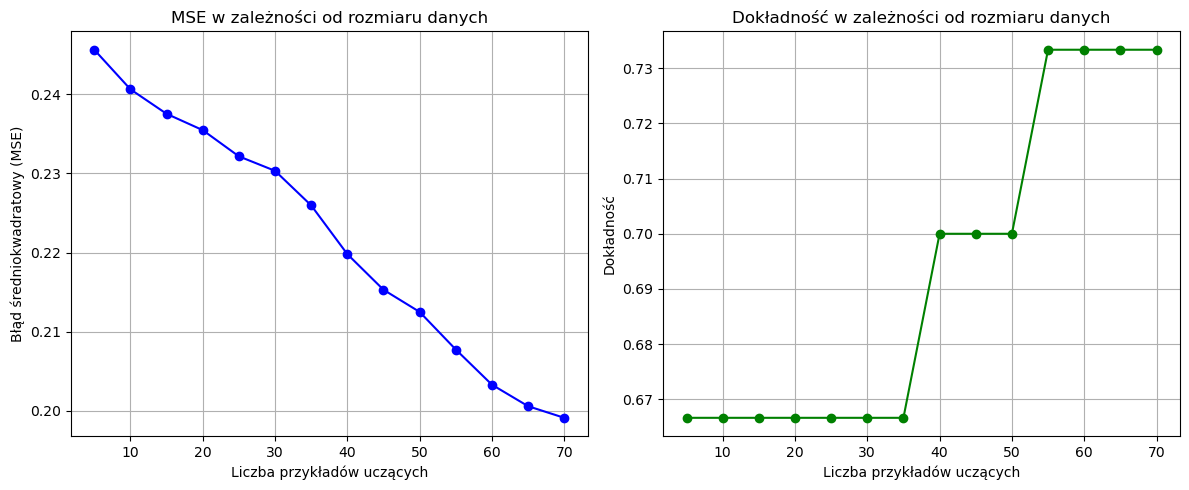


Wyniki:
Liczba przykładów   |   MSE    |   Dokładność
---------------------------------------------
        5          | 0.245639 | 0.666667
        10         | 0.240641 | 0.666667
        15         | 0.237541 | 0.666667
        20         | 0.235480 | 0.666667
        25         | 0.232168 | 0.666667
        30         | 0.230338 | 0.666667
        35         | 0.225970 | 0.666667
        40         | 0.219810 | 0.700000
        45         | 0.215307 | 0.700000
        50         | 0.212506 | 0.700000
        55         | 0.207756 | 0.733333
        60         | 0.203310 | 0.733333
        65         | 0.200595 | 0.733333
        70         | 0.199126 | 0.733333


In [103]:
plt.figure(figsize=(12, 5))
    
plt.subplot(1, 2, 1)
plt.plot(data_sizes, mse_values, 'o-', color='blue')
plt.xlabel('Liczba przykładów uczących')
plt.ylabel('Błąd średniokwadratowy (MSE)')
plt.title('MSE w zależności od rozmiaru danych')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(data_sizes, acc_values, 'o-', color='green')
plt.xlabel('Liczba przykładów uczących')
plt.ylabel('Dokładność')
plt.title('Dokładność w zależności od rozmiaru danych')
plt.grid(True)
    
plt.tight_layout()
plt.show()
    
print("\nWyniki:")
print("Liczba przykładów   |   MSE    |   Dokładność")
print("-" * 45)
for size, mse, acc in zip(data_sizes, mse_values, acc_values):
    print(f"{size:^18} | {mse:.6f} | {acc:.6f}")